# Lab 3

Authors: Owen & Muhammad

## Question 1

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# # KNN functions may produce FutureWarnings; the command below suppresses them.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
ic_homes = pd.read_csv("https://remiller1450.github.io/data/IowaCityHomeSales.csv")
ic_train, ic_test = train_test_split(ic_homes, test_size=0.2, random_state=7)

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_squared_error

my_variables = ['area.lot','area.bsmt']

## Part A
q1_pipeline = Pipeline([
    ('tranformer', QuantileTransformer()),
    ('model', KNeighborsRegressor(n_neighbors = 5, weights='distance'))
])
ic_train_X = ic_train[my_variables]
ic_train_y = ic_train['sale.amount']
ic_test_X = ic_test[my_variables]
ic_test_y = ic_test['sale.amount']

rmse = []
## Part B
for i in range(4, 21, 4):
    q1_pipeline.set_params(model__n_neighbors= i)
    fitted_pipe = q1_pipeline.fit(X = ic_train_X, y = ic_train_y)
    rmse.append(np.sqrt(mean_squared_error(ic_test_y, fitted_pipe.predict(ic_test_X))))
print(rmse)

[71970.64622718884, 68875.75130208433, 67740.2176816668, 67706.99191508097, 67802.59640777041]


/Users/muhammadkhalid/Desktop/f2025/STA395/intro/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2846: UserWarning: n_quantiles (1000) is greater than the total number of samples (621). n_quantiles is set to n_samples.
  warnings.warn(
/Users/muhammadkhalid/Desktop/f2025/STA395/intro/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2846: UserWarning: n_quantiles (1000) is greater than the total number of samples (621). n_quantiles is set to n_samples.
  warnings.warn(
/Users/muhammadkhalid/Desktop/f2025/STA395/intro/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2846: UserWarning: n_quantiles (1000) is greater than the total number of samples (621). n_quantiles is set to n_samples.
  warnings.warn(
/Users/muhammadkhalid/Desktop/f2025/STA395/intro/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2846: UserWarning: n_quantiles (1000) is greater than the total number of samples (621). n_quantiles is set to n_samples.
 

## Question 2

In [46]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

## Part A
q2_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', DecisionTreeRegressor())
])

q2_params = {'scaler': ['passthrough', MinMaxScaler(), MaxAbsScaler()],
         'model__max_depth': [2, 4, 6],
         'model__min_samples_split': [2, 100]}

params_to_print = ['rank_test_score','param_scaler','param_model__max_depth', 'param_model__min_samples_split', 'mean_test_score']
grid_results = GridSearchCV(q2_pipeline, q2_params, cv=10, scoring='neg_root_mean_squared_error').fit(ic_train_X, ic_train_y)
pd.DataFrame(grid_results.cv_results_).sort_values(by='rank_test_score')[params_to_print].head(5)


,rank_test_score,param_scaler,param_model__max_depth,param_model__min_samples_split,mean_test_score
8,1,MaxAbsScaler(),4,2,-69312.618401
7,1,MinMaxScaler(),4,2,-69312.618401
6,1,passthrough,4,2,-69312.618401
15,4,passthrough,6,100,-70935.418149
16,4,MinMaxScaler(),6,100,-70935.418149


In [47]:
## Part C
np.sqrt(mean_squared_error(ic_test_y, grid_results.best_estimator_.predict(ic_test_X)))

## Part D
# To reduce the complexity of the algorithm, we could remove the two scalers as possible 
# parameter in our GridSearchCV since decision trees are robust to scale

70890.3009833577

## Question 3

In [48]:
from scipy.stats import poisson, uniform
from sklearn.model_selection import RandomizedSearchCV


q3_pipeline = Pipeline([
    ('model', DecisionTreeRegressor())
])

q3_params = {'model__max_depth': poisson(4),
         'model__min_samples_split': uniform(loc=0, scale=0.8)}

params_to_print = ['rank_test_score' ,'param_model__max_depth', 'param_model__min_samples_split', 'mean_test_score']
grid_results = RandomizedSearchCV(q3_pipeline, q3_params, cv=10, scoring='neg_root_mean_squared_error', n_iter=25, random_state=0).fit(ic_train_X, ic_train_y)
pd.DataFrame(grid_results.cv_results_).sort_values(by='rank_test_score')[params_to_print].head(5)


,rank_test_score,param_model__max_depth,param_model__min_samples_split,mean_test_score
1,1,6,0.069703,-69619.491657
5,2,7,0.048180,-70473.496313
7,3,4,0.167101,-70739.685416
4,4,5,0.015032,-71149.004437
23,5,7,0.348692,-72040.239467


## Question 4

In [49]:
from sklearn.preprocessing import RobustScaler
# For our pipeline to work on the parameters, all the parameters need to be in the same dictionary
# The third dictionary we added doesn't fit a model and gives NaN justifying our comment
# about the fact that we need to have all the parameters in the same dictionary
my_params = [
    {"scaler": [MinMaxScaler(), RobustScaler()],
        "model": [DecisionTreeRegressor()],
        "model__max_depth": [2, 4, 6]},
    {"scaler": [MinMaxScaler(), RobustScaler()],
        "model": [KNeighborsRegressor()],
        "model__n_neighbors": [15, 30]},
]

my_pipeline = Pipeline([
    ('scaler', 'scaler'),
    ('model', KNeighborsRegressor())
])

grid_results = GridSearchCV(my_pipeline, my_params, cv=5, scoring='neg_root_mean_squared_error').fit(ic_train_X, ic_train_y)
pd.DataFrame(grid_results.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__max_depth,param_scaler,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.001077,0.000126,0.000696,0.000091,KNeighborsRegressor(),NaN,RobustScaler(),15.0,"{'model': KNeighborsRegressor(), 'model__n_nei...",-59108.846562,-70608.603434,-84767.025175,-48094.395525,-79158.282655,-68347.430670,13320.115431,1
9,0.001003,0.000055,0.000863,0.000230,KNeighborsRegressor(),NaN,RobustScaler(),30.0,"{'model': KNeighborsRegressor(), 'model__n_nei...",-56925.545421,-72347.701024,-84393.759397,-49423.253817,-81910.549377,-69000.161807,13739.713681,2
6,0.000825,0.000088,0.000746,0.000033,KNeighborsRegressor(),NaN,MinMaxScaler(),15.0,"{'model': KNeighborsRegressor(), 'model__n_nei...",-60337.656691,-73005.177833,-80969.904786,-50414.482674,-82391.369068,-69423.718211,12314.290851,3
2,0.000865,0.000016,0.000408,0.000013,DecisionTreeRegressor(),4.0,MinMaxScaler(),NaN,"{'model': DecisionTreeRegressor(), 'model__max...",-60868.253606,-73236.644144,-79723.617926,-57738.032191,-78215.168794,-69956.343332,9013.864060,4
3,0.001203,0.000138,0.000428,0.000037,DecisionTreeRegressor(),4.0,RobustScaler(),NaN,"{'model': DecisionTreeRegressor(), 'model__max...",-60868.253606,-73236.644144,-79723.617926,-57738.032191,-78215.168794,-69956.343332,9013.864060,4
8,0.000734,0.000015,0.000780,0.000041,KNeighborsRegressor(),NaN,MinMaxScaler(),30.0,"{'model': KNeighborsRegressor(), 'model__n_nei...",-60028.086647,-76713.562623,-84752.336259,-49556.563125,-85654.276424,-71340.965016,14255.819513,6
5,0.001247,0.000079,0.000421,0.000042,DecisionTreeRegressor(),6.0,RobustScaler(),NaN,"{'model': DecisionTreeRegressor(), 'model__max...",-76784.385525,-69709.710884,-82775.107696,-63372.794417,-75806.469441,-73689.693593,6616.362725,7
4,0.000923,0.000014,0.000403,0.000015,DecisionTreeRegressor(),6.0,MinMaxScaler(),NaN,"{'model': DecisionTreeRegressor(), 'model__max...",-76784.385525,-69709.710884,-82775.107696,-70067.120640,-75806.469441,-75028.558837,4829.142864,8
0,0.000970,0.000124,0.000492,0.000083,DecisionTreeRegressor(),2.0,MinMaxScaler(),NaN,"{'model': DecisionTreeRegressor(), 'model__max...",-73439.092074,-74689.564648,-91188.453072,-55135.582761,-89719.378211,-76834.414153,13107.468156,9
1,0.001197,0.000102,0.000474,0.000104,DecisionTreeRegressor(),2.0,RobustScaler(),NaN,"{'model': DecisionTreeRegressor(), 'model__max...",-73439.092074,-74689.564648,-91188.453072,-55135.582761,-89719.378211,-76834.414153,13107.468156,9


## Question 5

In [50]:
## Imports
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, StandardScaler, RobustScaler

## Set up data w/ mixed feature types 
my_variables = ['area.lot', 'area.living', 'style']
ic_train_X = ic_train[my_variables]
ic_train_y = ic_train['sale.amount']

## Get names of numeric and categorical columns
num_cols = ic_train_X.select_dtypes(exclude=['object']).columns.tolist()
cat_cols = ic_train_X.select_dtypes(include=['object']).columns.tolist()

## Make a separate pipeline for numeric vs. cat vars
num_transformer = Pipeline([('transformer',  PowerTransformer(method = 'yeo-johnson')),
                            ("scaler", StandardScaler())])
cat_transformer = Pipeline([("encoder", OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

## Put these pipelines together using ColumnTransformer()
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

## Create the final pipeline
final_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", KNeighborsRegressor())
])

my_params = {
    'preprocessor__num__scaler': [StandardScaler(), RobustScaler()],
    'model__n_neighbors': [10, 20]
}

grid_results = GridSearchCV(final_pipe, my_params, cv=5, scoring='neg_root_mean_squared_error').fit(ic_train_X, ic_train_y)

grid_results.best_estimator_

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


The best estimator is n_neighbors=10 for the KNN regressor with Standard scaler as the preferred scaling method

## Question 6

In [51]:
mnist = pd.read_csv("https://remiller1450.github.io/data/mnist_small.csv")

## Part A
mnist_train, mnist_test = train_test_split(mnist, test_size=0.1, random_state=10)
mnist_train_y = mnist_train['label']
mnist_test_y = mnist_test['label']
mnist_train_X = mnist_train.drop(['label'], axis=1)
mnist_test_X = mnist_test.drop(['label'], axis=1)

## Part B
from sklearn.neighbors import KNeighborsClassifier
q6_pipeline = Pipeline([
    ('scaler', 'passthrough'),
    ('model', KNeighborsClassifier())
])

## Part C
from sklearn.tree import DecisionTreeClassifier
q6_params = [
    {'scaler': ['passthrough', RobustScaler(), StandardScaler()],
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [5, 10, 15]
    },
    {'scaler': ['passthrough', RobustScaler(), StandardScaler()],
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [5, 10, 15]
    }
]

grid_results = GridSearchCV(q6_pipeline, q6_params, cv=5, scoring='accuracy').fit(mnist_train_X, mnist_train_y)
grid_results.best_estimator_

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None


The best performing model was KNN classifier with 5 neighbors and no scaling

Best Score: 0.92


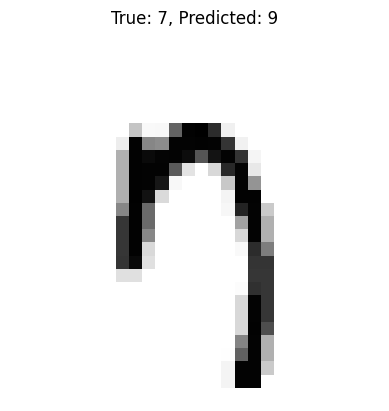

In [52]:
## Part D
from sklearn.metrics import accuracy_score
best_model = grid_results.best_estimator_
y_pred = best_model.predict(mnist_test_X)
score = accuracy_score(y_true=mnist_test_y, y_pred=y_pred)

print(f"Best Score: {score}")

## Part E
i = np.where(mnist_test_y != y_pred)[0][0]
mnist_unflattened = mnist_test_X.iloc[i].to_numpy()
mnist_unflattened = mnist_unflattened.reshape(28,28)

import matplotlib.cm as cm
import matplotlib.pyplot as plt

true_label = mnist_test_y.iloc[i]
pred_label = y_pred[i]
plt.imshow(mnist_unflattened, cmap=cm.Greys)
plt.title(f"True: {true_label}, Predicted: {pred_label}")
plt.axis("off")
plt.show()